<a href="https://colab.research.google.com/github/hibbyscus/Logistic_Regression/blob/main/Logistic_Regression_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [2]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based pn servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


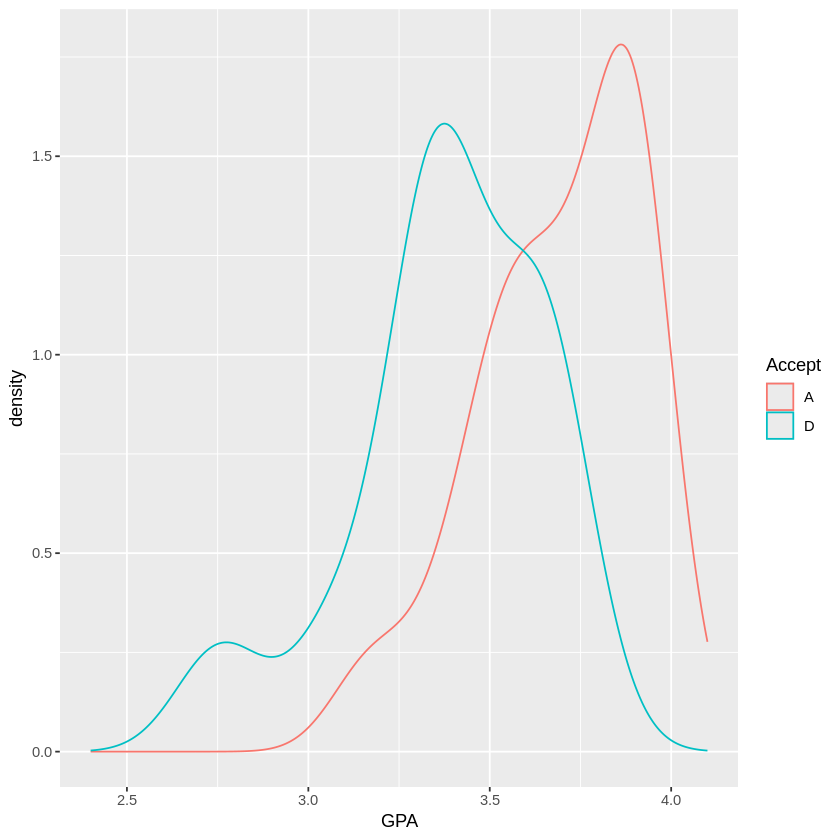

In [6]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

Q2: Explore the distribution of MCAT values for accepted and denied candidates.





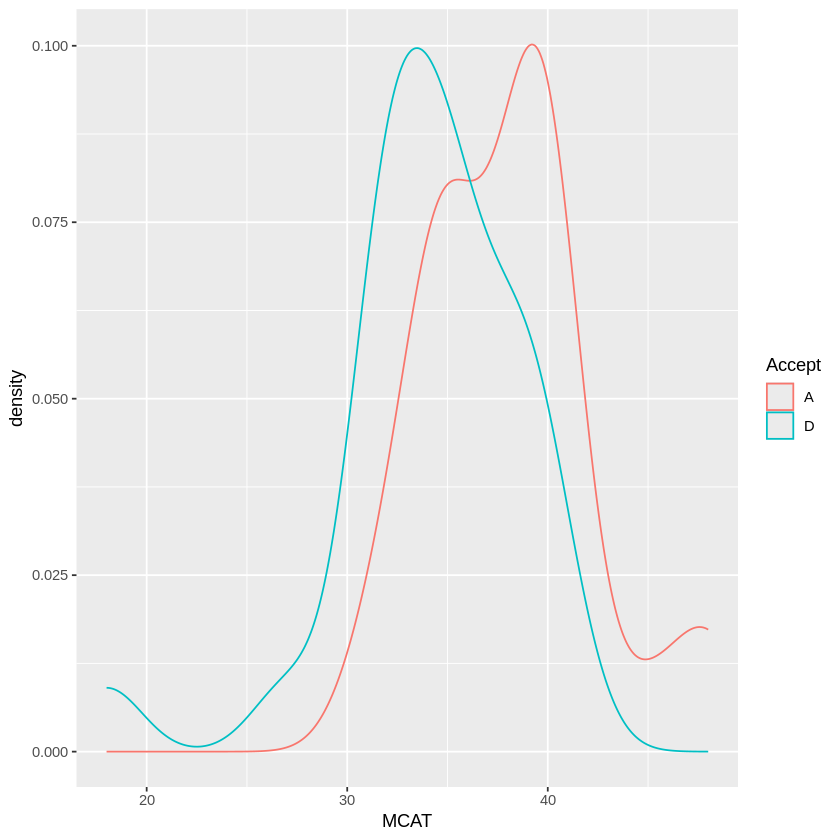

In [7]:
mydata %>%
  ggplot() +
  aes(x = MCAT, col = Accept) +
  geom_density()

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



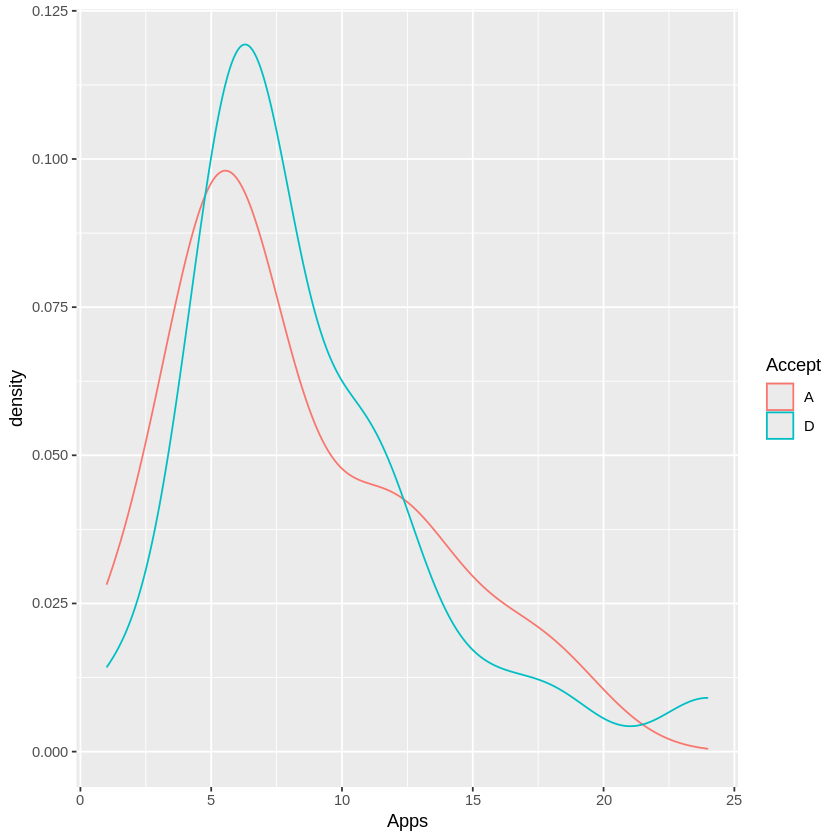

In [8]:
mydata %>%
  ggplot() +
  aes(x = Apps, col = Accept) +
  geom_density()

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


<ggproto object: Class FacetWrap, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetWrap, Facet, gg>

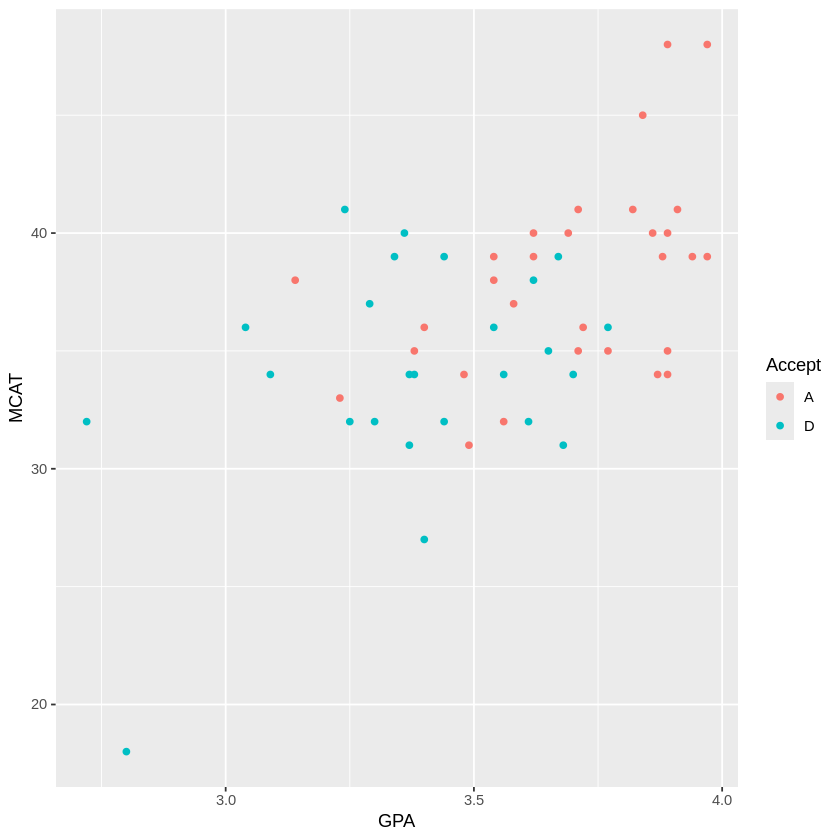

In [ ]:
mydata %>%
  ggplot() +
  aes(x = GPA, y = MCAT, col = Accept) +
  geom_point()
facet_wrap( ~ Sex)

In [ ]:
mydata %>%
  filter(MCAT > 20) %>%
  group_by(Sex) %>%
  summarize(cor(GPA, MCAT))

Sex,"cor(GPA, MCAT)"
<fct>,<dbl>
F,0.5097200
M,0.4008728


Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'


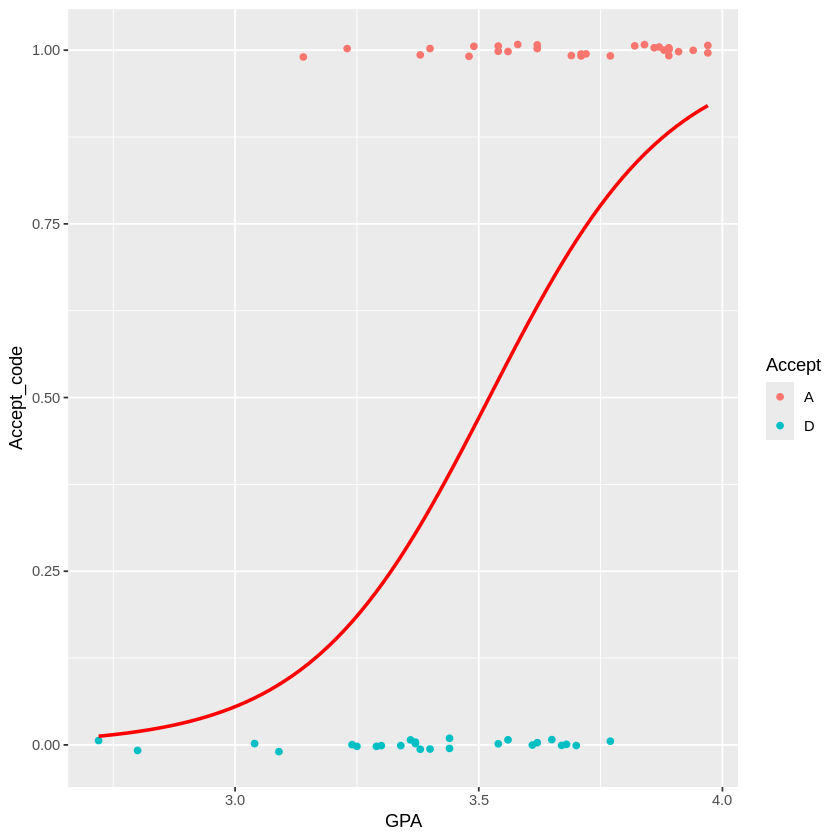

In [22]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)

Q7: Is the probability of acceptance based on GPA is similar(or different) for males and females?

In [10]:
mydata %>%
  group_by(Sex) %>%
  summarize(cor(GPA, Accept_code))

Sex,"cor(GPA, Accept_code)"
<fct>,<dbl>
F,0.5579463
M,0.5277225


The probability of acceptance based on GPA is similar between males and females because the probability for females is 0.56 while the probability for males is 0.53. So for females, they are slightly more likely than males to be accepted based on their GPA.


`geom_smooth()` using formula = 'y ~ x'


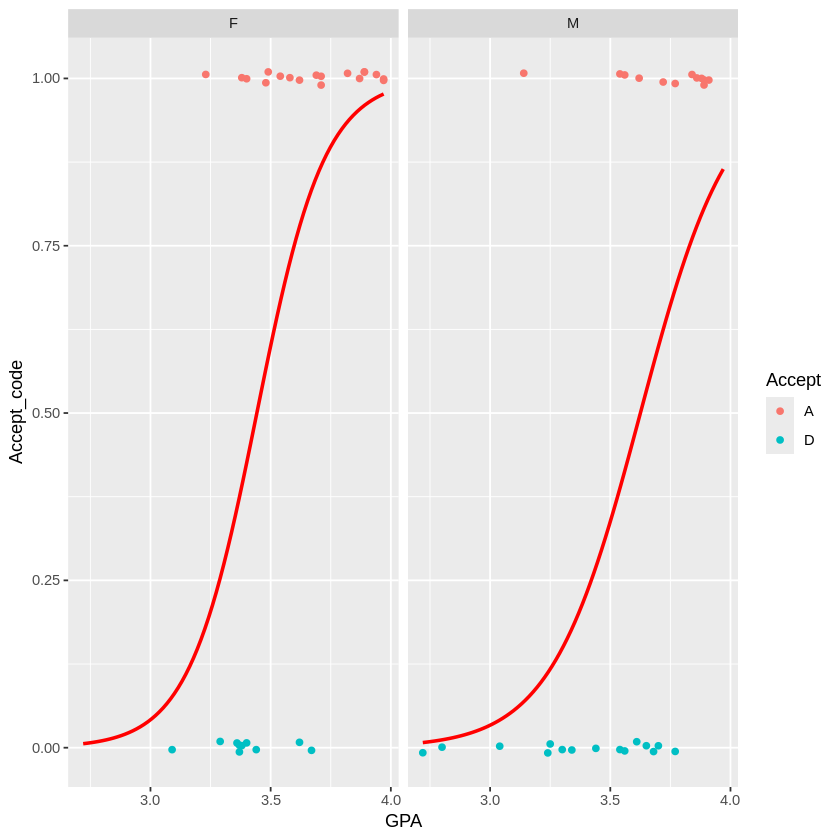

In [24]:
mydata %>%
  ggplot() +
    aes(x = GPA, y = Accept_code, col = Accept) +
    geom_jitter(height = 0.01, width = 0) +
    geom_smooth(method = 'glm',
                method.args = list(family = 'binomial'),
                se = FALSE,
                col = 'red',
                fullrange = TRUE) +
                  facet_wrap( ~ Sex)


PICTURES!!!

Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

In [11]:
model <- glm(Accept_code ~ GPA + Sex, family = 'binomial', data = mydata)
summary(model)


Call:
glm(formula = Accept_code ~ GPA + Sex, family = "binomial", data = mydata)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -21.0680     6.4025  -3.291 0.001000 ***
GPA           6.1324     1.8283   3.354 0.000796 ***
SexM         -1.1697     0.7178  -1.629 0.103210    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 53.945  on 52  degrees of freedom
AIC: 59.945

Number of Fisher Scoring iterations: 5


Q9: Write down equations of the two fitted logistic curves.

Equation for female logistic curve: P(Accept = 1 | Female) = 1 / (1 + exp(-(-21.1 + 6.1*GPA)))

Equation for male logistic curve: P(Accept = 1 | Male) = 1 / (1 + exp(-(-21.1 + 6.1*GPA + -1.2)))

Q10: What is the $R^2$ of your model?  Do you see one in your model output?

The R^2 of the model does not appear in the model output. However, we can use the residual deviance and the null deviance that the model output provides us with to deteermine the McFadden's R-squared.
The formula for McFadden's R-squared is 1 - (Residual deviance / Null Deviance)
Therefore the R^2 of this model is 1 - (53.945 / 75.791) = 0.288

This value (0.288) means that the logistic regression model explains a small portion of the variation in the dependent variable (Acceptance) based on the independent variables (GPA and Sex).

In [ ]:
model2 <- glm(Accept_code ~ GPA, family = 'binomial', data = mydata)
summary(model2)


Call:
glm(formula = Accept_code ~ GPA, family = "binomial", data = mydata)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -19.207      5.629  -3.412 0.000644 ***
GPA            5.454      1.579   3.454 0.000553 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 56.839  on 53  degrees of freedom
AIC: 60.839

Number of Fisher Scoring iterations: 4
